<a href="https://colab.research.google.com/github/JavohirTF7/Deep-learning-/blob/main/project_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
import torch

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!cd OIDv4_ToolKit/ && pip install -r requirements.txt

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 14.83 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 10.4 MB/s 
     |████████████████████████████████| 636 kB 43.4 MB/s 
     |████████████████████████████████| 548 kB 6.7 MB/s 
     |████████████████████████████████| 79 kB 2.8 MB/s 
     |████████████████████████████████| 9.9 MB 47.2 MB/s 
     |████████████████████████████████| 140 kB 7.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstal

In [ ]:
!cd OIDv4_ToolKit/ && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

optional arguments:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID da

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 41889 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [ ]:
from fastai.vision.all import*
from fastai.text.all import *
from ipywidgets import widgets

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
path=Path('train')

In [ ]:
path.ls()

(#3) [Path('train/Airplane'),Path('train/Car'),Path('train/Boat')]

In [ ]:
fls=get_image_files(path)

#Create Datablock

In [ ]:
transports=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=32),
    get_y=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
dls=transports.dataloaders(path)

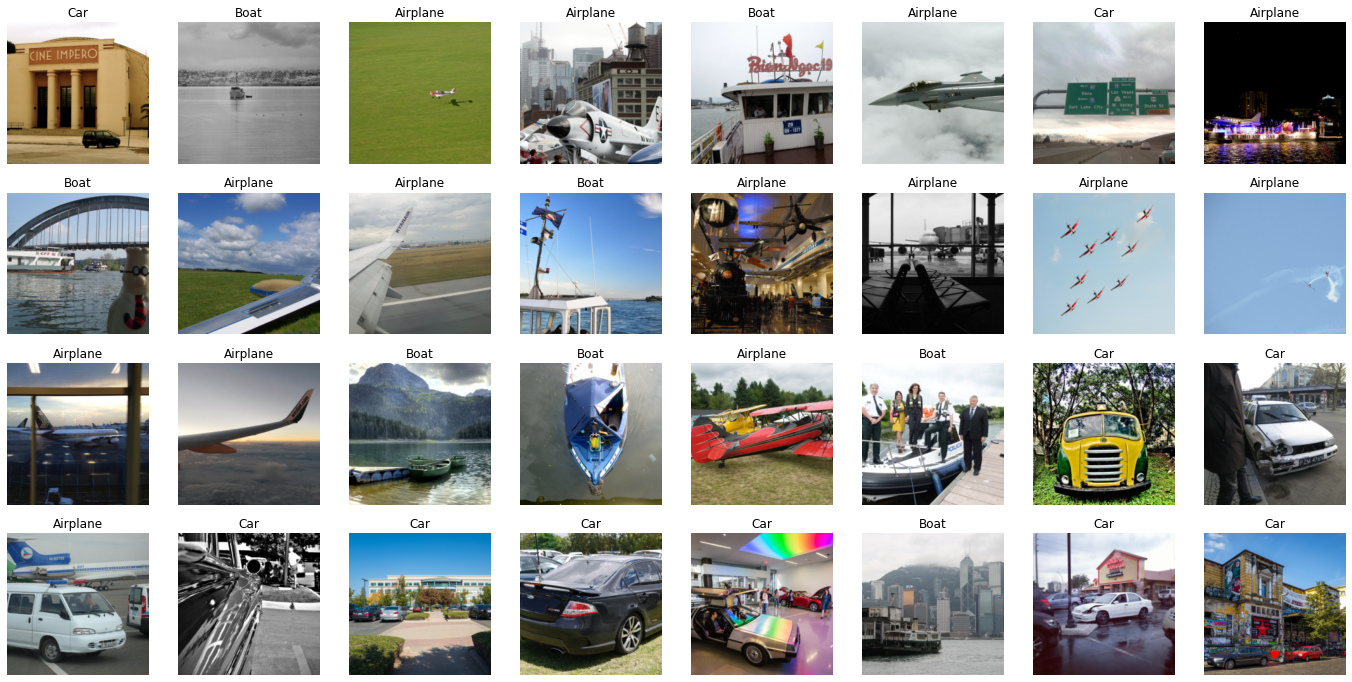

In [ ]:
dls.train.show_batch(max_n=32,nrows=4)

**Training**

In [ ]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.669411,0.410096,0.900000,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.494276,0.303306,0.925000,00:10
1,0.363878,0.299131,0.900000,00:10
2,0.244219,0.286959,0.908333,00:11
3,0.191174,0.285356,0.908333,00:10


**Tekshirish**

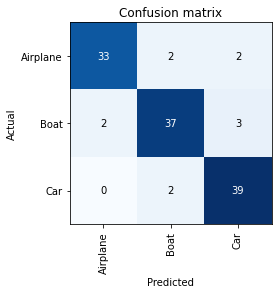

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

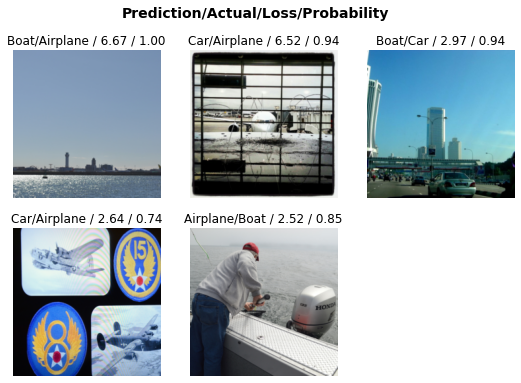

In [ ]:
interp.plot_top_losses(5,nrows=2)

#Modelni tekshirib ko'ramiz

In [ ]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Car
Ehtimollik:99.496681%


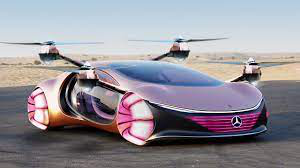

In [ ]:
img=PILImage.create(upload.data[-1])
pred,pred_id,probs=learn.predict(img)
print(f"Bashorat:{pred}")
print(f"Ehtimollik:{probs[pred_id]*100:1f}%")
img

**Modelni saqlash**

In [ ]:
learn.export('Transport_model.pkl')

**Modelni qayta yuklab tekshirish**

In [ ]:
model=load_learner("/content/Transport_model.pkl")


In [ ]:
model.predict(img)

('Car', TensorBase(2), TensorBase([0.0039, 0.0012, 0.9950]))

In [ ]:
fastai.__version__


'2.7.10'

#deploy qilish